# Data Exploration of COVID-19
14 March 2020

Cecilia García López de Munain

## Libraries

In [42]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import pickle

## Parameters

In [43]:
sys.path.append('./')

In [44]:
PATH_ROOT_INPUT_DATA = 'data\\input'
INPUT_DATA_NAME = 'COVID-19-geographic-disbtribution-worldwide-2020-04-05.xlsx'
INPUT_DATA_POPULATION_NAME = 'population_by_country.csv'
INPUT_DATA_POPDENSITY_NAME = 'populationdensity_by_country.csv'

PATH_ROOT_INTERIM_DATA = 'data\\interim'
INTERIM_DATA_NAME = 'covid_19_data_cum.pkl'

## Import Data

### Population Data

Source: UN

In [45]:
population_by_country = pd.read_csv(os.path.join(PATH_ROOT_INPUT_DATA,INPUT_DATA_POPULATION_NAME), skiprows=4)

In [46]:
population_by_country.head()

,Country Name,2018
0,Aruba,105845.0
1,Afghanistan,37172386.0
2,Angola,30809762.0
3,Albania,2866376.0
4,Andorra,77006.0


In [47]:
population_by_country.rename(columns={'2018':'Population'}, inplace=True)

In [48]:
population_by_country.dtypes

Country Name     object
Population      float64
dtype: object

### Population Density Data

Source: UN

In [49]:
popdensity_by_country = pd.read_csv(os.path.join(PATH_ROOT_INPUT_DATA,INPUT_DATA_POPDENSITY_NAME), skiprows=4)

In [50]:
popdensity_by_country.head()

,Country Name,2018
0,Aruba,588.027778
1,Afghanistan,56.937760
2,Angola,24.713052
3,Albania,104.612263
4,Andorra,163.842553


In [51]:
popdensity_by_country.rename(columns={'2018':'Population Density'}, inplace=True)

In [52]:
popdensity_by_country.dtypes

Country Name           object
Population Density    float64
dtype: object

### COVID Data

Source: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

In [53]:
covid19_data = pd.read_excel(os.path.join(PATH_ROOT_INPUT_DATA,INPUT_DATA_NAME))

In [54]:
covid19_data.head()

,DateRep,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,countryterritoryCode,popData2018
0,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
1,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
2,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
3,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0
4,2020-04-01,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0


In [55]:
covid19_data.dtypes

DateRep                 datetime64[ns]
Day                              int64
Month                            int64
Year                             int64
NewConfCases                     int64
NewDeaths                        int64
CountryExp                      object
GeoId                           object
countryterritoryCode            object
popData2018                    float64
dtype: object

In [56]:
covid19_data.shape

(8905, 10)

In [57]:
# Checking for nulls
covid19_data.isnull().sum()

DateRep                  0
Day                      0
Month                    0
Year                     0
NewConfCases             0
NewDeaths                0
CountryExp               0
GeoId                   22
countryterritoryCode    81
popData2018             32
dtype: int64

In [58]:
# Don't know what this feature is so it doesn't matter for now
# covid19_data[~covid19_data.Gaul1Nuts1.isnull()].head()

## Prepare Data

COVID Data

In [59]:
# Set datetime index
covid19_data.set_index('DateRep', inplace=True)

In [60]:
covid19_data.head()

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,countryterritoryCode,popData2018
DateRep,,,,,,,,,
2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0
2020-04-01,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0


In [61]:
covid19_data.sort_index(inplace=True)

In [62]:
# Group by country
groupcols = ['CountryExp']

In [63]:
# Create cumulative features
covid19_data['NewConfCases_cum'] = covid19_data.groupby(groupcols)['NewConfCases'].cumsum()
covid19_data['NewDeaths_cum'] = covid19_data.groupby(groupcols)['NewDeaths'].cumsum()

In [64]:
covid19_data.CountryExp.unique()[:2]

array(['Georgia', 'Israel'], dtype=object)

In [65]:
# Checks
covid19_data[covid19_data['CountryExp'].isin(['Afghanistan', 'Albania'])].tail(10)

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,countryterritoryCode,popData2018,NewConfCases_cum,NewDeaths_cum
DateRep,,,,,,,,,,,
2020-04-01,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0,166,4
2020-04-01,1,4,2020,20,3,Albania,AL,ALB,2866376.0,243,15
2020-04-02,2,4,2020,16,0,Albania,AL,ALB,2866376.0,259,15
2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0,192,4
2020-04-03,3,4,2020,18,1,Albania,AL,ALB,2866376.0,277,16
2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0,235,4
2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0,235,4
2020-04-04,4,4,2020,27,1,Albania,AL,ALB,2866376.0,304,17
2020-04-05,5,4,2020,29,2,Albania,AL,ALB,2866376.0,333,19


## Plot exploration

### Plot cases confirmed by date

In [66]:
covid19_data_bydate = covid19_data.groupby(covid19_data.index)['NewConfCases'].sum()

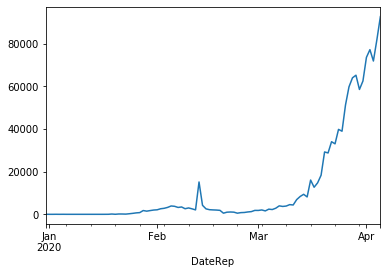

In [67]:
covid19_data_bydate.plot()

In [68]:
# Huge peak in February
covid19_data[covid19_data['NewConfCases'] >= 12000]

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,countryterritoryCode,popData2018,NewConfCases_cum,NewDeaths_cum
DateRep,,,,,,,,,,,
2020-02-13,13,2,2020,15141,254,China,CN,CHN,1.392730e+09,59865,1368
2020-03-26,26,3,2020,13963,249,United_States_of_America,US,USA,3.271674e+08,69194,1050
2020-03-27,27,3,2020,16797,246,United_States_of_America,US,USA,3.271674e+08,85991,1296
2020-03-28,28,3,2020,18695,411,United_States_of_America,US,USA,3.271674e+08,104686,1707
2020-03-29,29,3,2020,19979,484,United_States_of_America,US,USA,3.271674e+08,124665,2191
2020-03-30,30,3,2020,18360,318,United_States_of_America,US,USA,3.271674e+08,143025,2509
2020-03-31,31,3,2020,21595,661,United_States_of_America,US,USA,3.271674e+08,164620,3170
2020-04-01,1,4,2020,24998,909,United_States_of_America,US,USA,3.271674e+08,189618,4079
2020-04-02,2,4,2020,27103,1059,United_States_of_America,US,USA,3.271674e+08,216721,5138


In [69]:
covid19_data[covid19_data.index == '2020-02-13'].sort_values('NewConfCases', ascending=False).head()

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,countryterritoryCode,popData2018,NewConfCases_cum,NewDeaths_cum
DateRep,,,,,,,,,,,
2020-02-13,13,2,2020,15141,254,China,CN,CHN,1.392730e+09,59865,1368
2020-02-13,13,2,2020,4,1,Japan,JP,JPN,1.265291e+08,29,1
2020-02-13,13,2,2020,3,0,Singapore,SG,SGP,5.638676e+06,50,0
2020-02-13,13,2,2020,1,0,Vietnam,VN,VNM,9.554040e+07,16,0
2020-02-13,13,2,2020,1,0,United_States_of_America,US,USA,3.271674e+08,14,0


In [70]:
# Because China has a different scale I'm separating it
covid19_data_china = covid19_data[covid19_data['CountryExp'] == 'China']
covid19_data_nonchina = covid19_data[covid19_data['CountryExp'] != 'China']

#### China 

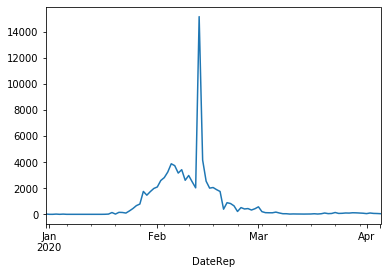

In [71]:
covid19_data_bydate_china = covid19_data_china.groupby(covid19_data_china.index)['NewConfCases'].sum()
covid19_data_bydate_china.plot()

#### Non China

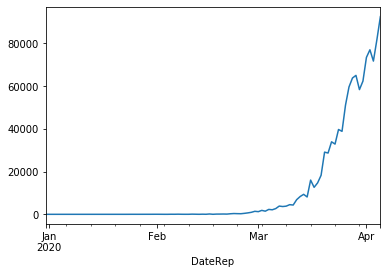

In [72]:
covid19_data_bydate_nonchina = covid19_data_nonchina.groupby(covid19_data_nonchina.index)['NewConfCases'].sum()
covid19_data_bydate_nonchina.plot()

While China seems to have passed the worst phase of the disease, the rest of the countries seem to be entering it

#### Countries worst infected

In [74]:
countries_worst = covid19_data_nonchina.groupby(['CountryExp'])['NewConfCases'].sum().sort_values(ascending=False).head(15).index
covid19_data_nonchina.groupby(['CountryExp'])['NewConfCases'].sum().sort_values(ascending=False).head(15)

CountryExp
United_States_of_America    312237
Spain                       124736
Italy                       124632
Germany                      91714
France                       68605
Iran                         55743
United_Kingdom               41903
Turkey                       23934
Switzerland                  20489
Belgium                      18431
Netherlands                  16627
Canada                       13882
Austria                      11766
Portugal                     10524
Brazil                       10278
Name: NewConfCases, dtype: int64

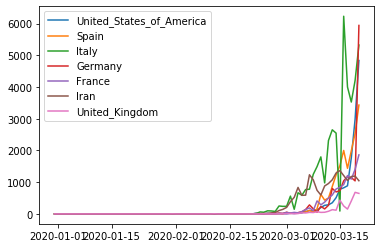

In [88]:
data_nonchina_before = covid19_data_nonchina.loc[covid19_data_nonchina.index<'2020-03-21',:]

for i, country in enumerate(countries_worst): 
    data = data_nonchina_before[data_nonchina_before['CountryExp'] == country].groupby(data_nonchina_before[data_nonchina_before['CountryExp'] == country].index)['NewConfCases'].sum()
    plt.plot(data, label=country)
    if i == 6:
        break
plt.legend()

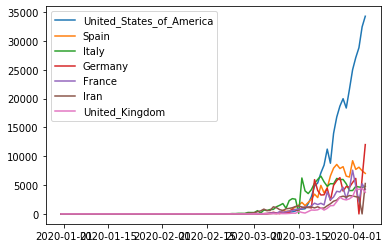

In [75]:
for i, country in enumerate(countries_worst): 
    data = covid19_data_nonchina[covid19_data_nonchina['CountryExp'] == country].groupby(covid19_data_nonchina[covid19_data_nonchina['CountryExp'] == country].index)['NewConfCases'].sum()
    plt.plot(data, label=country)
    if i == 6:
        break
plt.legend()

South Korea seems to be handling it differently.

#### Argentina

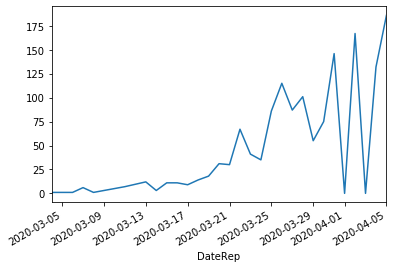

In [76]:
covid19_data_nonchina[covid19_data_nonchina['CountryExp'] == 'Argentina'].groupby(covid19_data_nonchina[covid19_data_nonchina['CountryExp'] == 'Argentina'].index)['NewConfCases'].sum().plot()

## Plot contagion trend evolution analysis

### China

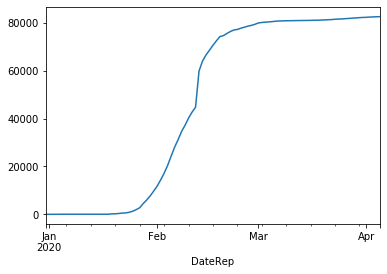

In [77]:
country_filter = 'China'
covid19_data[covid19_data['CountryExp'] == country_filter]['NewConfCases_cum'].plot()

China is entering a stationary phase

### Countries worst

In [78]:
countries_worst

Index(['United_States_of_America', 'Spain', 'Italy', 'Germany', 'France',
       'Iran', 'United_Kingdom', 'Turkey', 'Switzerland', 'Belgium',
       'Netherlands', 'Canada', 'Austria', 'Portugal', 'Brazil'],
      dtype='object', name='CountryExp')

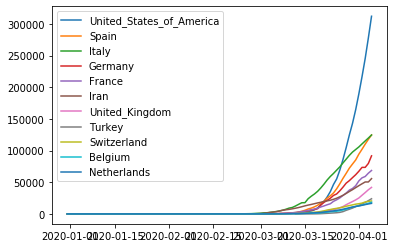

In [79]:
for i, country in enumerate(countries_worst): 
    plt.plot(covid19_data[covid19_data['CountryExp'] == country]['NewConfCases_cum'], label=country)
    if i == 10:
        break
plt.legend()

Other countries (non China) seem to be still raising. South Korea has a different behaviour - ? 

## Join datasets

In [66]:
population_by_country.head()

,Country Name,Population
0,Aruba,105845.0
1,Afghanistan,37172386.0
2,Angola,30809762.0
3,Albania,2866376.0
4,Andorra,77006.0


In [67]:
covid19_data.head()

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum
DateRep,,,,,,,,,
2019-12-31,31,12,2019,0,0,North_Macedonia,MK,0,0
2019-12-31,31,12,2019,0,0,Azerbaijan,AZ,0,0
2019-12-31,31,12,2019,0,0,Singapore,SG,0,0
2019-12-31,31,12,2019,0,0,Brazil,BR,0,0
2019-12-31,31,12,2019,0,0,Kuwait,KW,0,0


Joining with population data

In [68]:
covid19_data_pop = covid19_data.reset_index().merge(population_by_country, how='left', left_on='CountryExp', right_on='Country Name').set_index('DateRep')

In [69]:
covid19_data_pop.head()

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum,Country Name,Population
DateRep,,,,,,,,,,,
2019-12-31,31,12,2019,0,0,North_Macedonia,MK,0,0,NaN,NaN
2019-12-31,31,12,2019,0,0,Azerbaijan,AZ,0,0,Azerbaijan,9942334.0
2019-12-31,31,12,2019,0,0,Singapore,SG,0,0,Singapore,5638676.0
2019-12-31,31,12,2019,0,0,Brazil,BR,0,0,Brazil,209469333.0
2019-12-31,31,12,2019,0,0,Kuwait,KW,0,0,Kuwait,4137309.0


Joining with population density data

In [70]:
covid19_data_popden = covid19_data_pop.reset_index().merge(popdensity_by_country, how='left', left_on='CountryExp', right_on='Country Name').set_index('DateRep')

In [71]:
covid19_data_popden.head()

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum,Country Name_x,Population,Country Name_y,Population Density
DateRep,,,,,,,,,,,,,
2019-12-31,31,12,2019,0,0,North_Macedonia,MK,0,0,NaN,NaN,NaN,NaN
2019-12-31,31,12,2019,0,0,Azerbaijan,AZ,0,0,Azerbaijan,9942334.0,Azerbaijan,120.265320
2019-12-31,31,12,2019,0,0,Singapore,SG,0,0,Singapore,5638676.0,Singapore,7952.998418
2019-12-31,31,12,2019,0,0,Brazil,BR,0,0,Brazil,209469333.0,Brazil,25.061716
2019-12-31,31,12,2019,0,0,Kuwait,KW,0,0,Kuwait,4137309.0,Kuwait,232.172222


In [72]:
covid19_data_popden.drop(columns=['Country Name_x','Country Name_y'], inplace=True)

# Export

In [73]:
with open(os.path.join(PATH_ROOT_INTERIM_DATA,INTERIM_DATA_NAME), 'wb') as f:
    pickle.dump(covid19_data_popden, f)